In [3]:
import cv2
import numpy as np
MIN_ANGLE_DIFF = 10
W_SIZE = 35
import matplotlib.pyplot as plt

from edge_searching import *
from curve_fitting import *

In [53]:

impath = '/home/pronton/SeAH/data/cam4_20230907_143145/'
img_paths = [impath + idx + '.jpg' for idx in np.array(list(range(120,190,20)), dtype=str)]
print(img_paths)

['/home/pronton/SeAH/data/cam4_20230907_143145/120.jpg', '/home/pronton/SeAH/data/cam4_20230907_143145/140.jpg', '/home/pronton/SeAH/data/cam4_20230907_143145/160.jpg', '/home/pronton/SeAH/data/cam4_20230907_143145/180.jpg']


/home/pronton/.virtualvenvs/SeAH/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pronton/.virtualvenvs/SeAH/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/pronton/.virtualvenvs/SeAH/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pronton/.virtu

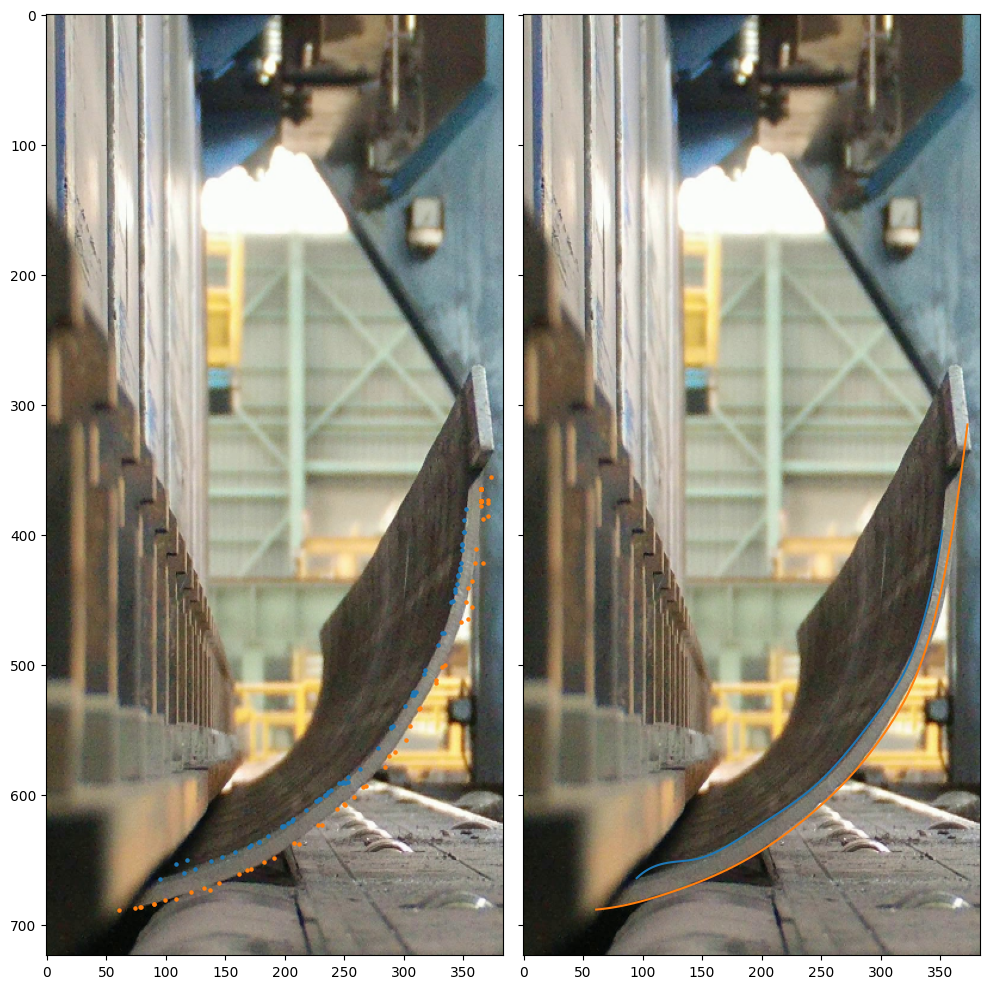

In [45]:
n_cols = len(img_paths)
fig, aux = plt.subplots(n_cols, 2, sharex=True, sharey=True, figsize=(10, 10))


for i in range(n_cols):
    # slide window
    img = cv2.imread(img_paths[i]) # img = cv2.imread(argv[1])
    inner_segs, outer_segs = sliding_window(img)
    scale = .5
    img = cv2.resize(img, (0,0), fx = scale, fy = scale)

    # curve fitting
    segs = np.array(inner_segs)
    X = np.concatenate((segs[:, 0], segs[:, 2]) , axis = 0).reshape(-1, 1)
    y = np.concatenate((segs[:, 1], segs[:, 3]) , axis = 0).reshape(-1, 1)
    aux[].imshow(img[:,:,::-1],  aspect="auto")
    aux[0].scatter(X, y, s = 5)
    model = curve_fit(X, y)
    X_test, y_pred = predict_curve(X,y,model)
    aux[1].plot(X_test, y_pred, )

    segs = np.array(outer_segs)
    X = np.concatenate((segs[:, 0], segs[:, 2]) , axis = 0).reshape(-1, 1)
    y = np.concatenate((segs[:, 1], segs[:, 3]) , axis = 0).reshape(-1, 1)
    aux[0].scatter(X, y, s = 5)
    model = curve_fit(X, y)
    X_test, y_pred = predict_curve(X,y,model)
    aux[1].plot(X_test, y_pred)
    aux[1].imshow(img[:,:,::-1],  aspect="auto")
    fig.tight_layout()


/home/pronton/.virtualvenvs/SeAH/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/pronton/.virtualvenvs/SeAH/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


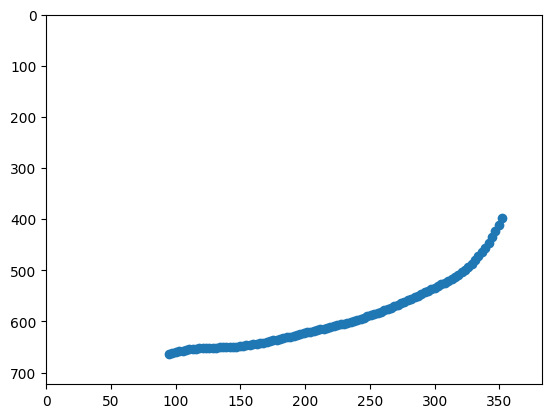

In [16]:
segs = np.array(inner_segs)
X = np.concatenate((segs[:, 0], segs[:, 2]) , axis = 0).reshape(-1, 1)
y = np.concatenate((segs[:, 1], segs[:, 3]) , axis = 0).reshape(-1, 1)
model = curve_fit(X, y)
X_test, y_pred = predict_curve(X,y,model)
ax = plt.scatter(X_test, y_pred).axes
plt.xlim([0,383])
plt.ylim([0,723])
ax.invert_yaxis()